<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# python抽样分布实现

- 验证数据是否服从正态分布
- 验证数据是否服从t分布
- 验证数据是否服从$\chi^2$分布

In [1]:
import pandas as pd 
import numpy as np 
df:pd.DataFrame=pd.read_excel('week7/data.xlsx',index_col=0)

df.head()


,Age,Fare,Embarked
ID,,,
1,22.0,7.2500,S
2,38.0,71.2833,C
3,26.0,7.9250,S
4,35.0,53.1000,S
5,35.0,8.0500,S


In [2]:
# 按照港口分类，计算数据统计量
embark_basic:pd.DataFrame=df.groupby('Embarked').agg([
    'count','min','max','median','mean','var','std'
])
embark_basic.head()


Age                                                       Fare  \
         count   min   max median       mean         var        std count   
Embarked                                                                    
C          130  0.42  71.0   29.0  30.814769  238.234892  15.434860   130   
Q           28  2.00  70.5   27.0  28.089286  286.130622  16.915396    28   
S          554  0.67  80.0   28.0  29.445397  200.029876  14.143192   554   

                                                                        
             min       max   median       mean          var        std  
Embarked                                                                
C         4.0125  512.3292  36.2521  68.296767  8200.719153  90.557822  
Q         6.7500   90.0000   7.7500  18.265775   477.142064  21.843582  
S         0.0000  263.0000  13.0000  27.476284  1335.636543  36.546362

In [3]:
age_basic:pd.DataFrame=embark_basic['Age']
fare_basic:pd.DataFrame=embark_basic['Fare']

age_basic.head()


,count,min,max,median,mean,var,std
Embarked,,,,,,,
C,130,0.42,71.0,29.0,30.814769,238.234892,15.434860
Q,28,2.00,70.5,27.0,28.089286,286.130622,16.915396
S,554,0.67,80.0,28.0,29.445397,200.029876,14.143192


In [4]:
fare_basic.head()


,count,min,max,median,mean,var,std
Embarked,,,,,,,
C,130,4.0125,512.3292,36.2521,68.296767,8200.719153,90.557822
Q,28,6.7500,90.0000,7.7500,18.265775,477.142064,21.843582
S,554,0.0000,263.0000,13.0000,27.476284,1335.636543,36.546362


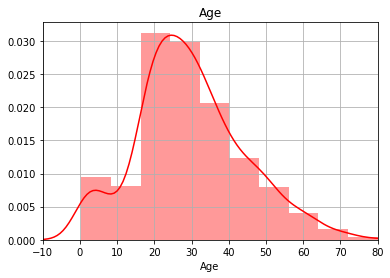

In [5]:
# 验证价格、年龄是否服从正态分布
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_palette('hls')
sns.distplot(df['Age'],color='r',bins=10,kde=True)
plt.title('Age')
plt.xlim(-10,80)
plt.grid(True)


In [6]:
# 验证是否服从正态分布
from scipy import stats

ks_test=stats.kstest(df['Age'],'norm')
shapiro_test=stats.shapiro(df['Age'])
normal_test=stats.normaltest(df['Age'])

print('ks_test:',ks_test)
print('shapiro_test: ',shapiro_test)

# p<0.05, 拒绝原假设，认为数据不服从正态分布
print('normal_test: ',normal_test)


ks_test: KstestResult(statistic=0.9649422367998306, pvalue=0.0)
shapiro_test:  (0.9815102219581604, 7.906476895414016e-08)
normal_test:  NormaltestResult(statistic=18.12938011101228, pvalue=0.00011567916063448067)


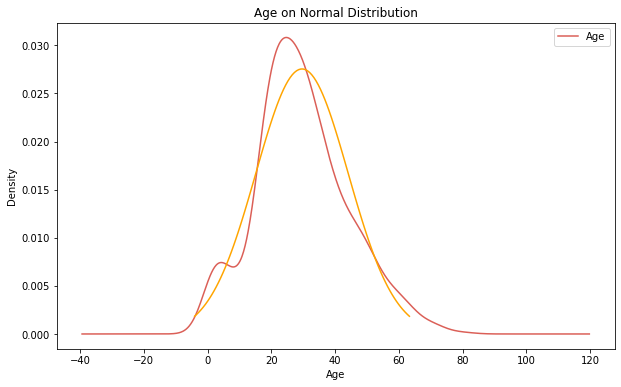

In [7]:
plt.figure(figsize=(10,6))
df["Age"].plot(kind='kde')
# loc均值，scale方差
# norm.fit()返回均值、方差
loc,scale=stats.norm.fit(df['Age'])

# 构造以loc为均值，以scale为方差的正态分布
normal_dist=stats.norm(loc,scale)
x=np.linspace(normal_dist.ppf(0.01),normal_dist.ppf(0.99),100)

plt.plot(x,normal_dist.pdf(x),c='orange')
plt.xlabel('Age')
plt.title('Age on Normal Distribution')
plt.legend()



In [8]:
# 验证是否服从t分布
# returns degree of freedom,loc,scale
dof,loc,scale=stats.t.fit(df['Age'])
ks=stats.t.rvs(df=dof,loc=loc,scale=scale,size=len(df))
# p>0.05, 不拒绝原假设，认为这两个样本的分布是相同的
stats.ks_2samp(df['Age'],ks)



Ks_2sampResult(statistic=0.07443820224719101, pvalue=0.03865964177954749)

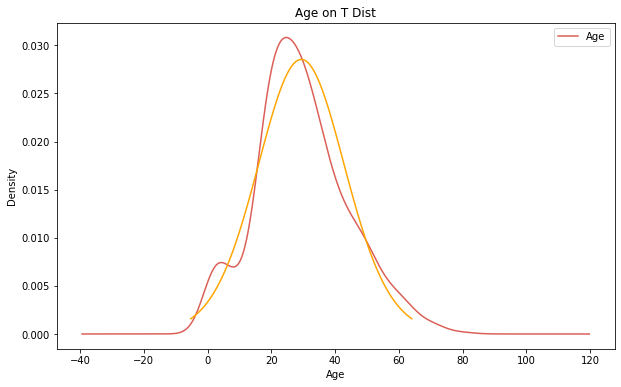

In [9]:
plt.figure(figsize=(10,6))
df['Age'].plot(kind='kde')
t=stats.t(dof,loc,scale)
x=np.linspace(t.ppf(.01),t.ppf(.99),100)
plt.plot(x,t.pdf(x),c='orange')
plt.xlabel('Age')
plt.title('Age on T Dist')
plt.legend()


In [10]:
# 验证是否服从chi2分布
dof,loc,scale=stats.chi2.fit(df['Age'])
chi2=stats.chi2.rvs(df=dof,loc=loc,scale=scale,
size=len(df))
stats.ks_2samp(df['Age'],chi2)

Ks_2sampResult(statistic=0.07443820224719101, pvalue=0.03865964177954749)

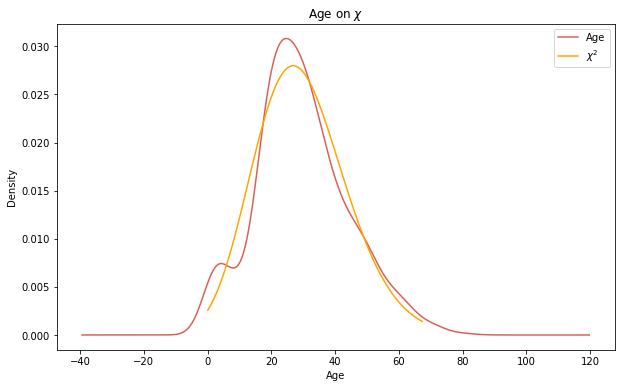

In [11]:
plt.figure(figsize=(10,6))
df['Age'].plot(kind='kde')
chi2_dist=stats.chi2(df=dof,loc=loc,scale=scale)
x=np.linspace(chi2_dist.ppf(.01),chi2_dist.ppf(.99),100)
plt.plot(x,chi2_dist.pdf(x),c='orange',label='$\chi^2$')
plt.xlabel('Age')
plt.title('Age on $\chi%2$ ')   
plt.legend()
